In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from Ska.engarchive import fetch as fetch
from Ska.Matplotlib import plot_cxctime
from Chandra.Time import DateTime
from ftplib import FTP
from astropy.io import ascii

In [2]:
def plot_hrc_shield(times, vals, color='C0', marker=None, linestyle='solid'):
    secs = times
    hrc_shield = vals / 256.
    bad = hrc_shield < 0.1
    hrc_shield = hrc_shield[~bad]
    secs = secs[~bad]

    plt.figure(1, figsize=(6, 4))
    ticks, fig, ax = plot_cxctime(secs, hrc_shield,
                                  color=color, marker=marker, linestyle=linestyle)
    xlims = ax.get_xlim()
    dx = (xlims[1] - xlims[0]) / 20.
    ax.set_xlim(xlims[0] - dx, xlims[1] + dx)
    ax.set_ylim(min(hrc_shield.min() * 0.5, 10.0),
                max(hrc_shield.max() * 2, 300.))
    plt.plot([xlims[0] - dx, xlims[1] + dx], [235, 235], '--r')
    ax.set_yscale('log')
    plt.grid()
    plt.title('GOES proxy for HRC shield rate / 256')
    plt.ylabel('Cts / sample')
    plt.tight_layout()    

In [3]:
NAMES = ['YR', 'MO', 'DA', 'HHMM', 'Day1', 'Day2', 'P1', 'P2', 'P3',
         'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11']

In [4]:
# Uncomment this cell to generate the data table
"""
date1 = '2015-05-30T00:00:00.00'
date2 = '2020-01-23T00:00:00.00'

ftp = FTP("ftp.swpc.noaa.gov")
ftp.login()

ftp.cwd("/pub/lists/pchan/")

rows = []

mjd = DateTime(date1).mjd
while mjd < DateTime(date2).mjd:
    date = DateTime(mjd, format='mjd').fits
    tmp = date.replace("-", "")[:8]
    # secondary data, change to `Gp` for primary data
    filename = f"{tmp}_Gs_pchan_5m.txt"   
    local_filename = "tmp_protons.txt"
    
    # retrieve the file
    lf = open(local_filename, "wb")
    ftp.retrbinary("RETR " + filename, lf.write, 8*1024)
    lf.close()
    
    with open(local_filename) as lf:
        for line in lf:
            if 'Source' in line:
                satellite = line.strip()[-2:]
                row = {'satellite': satellite, 'time_mjd': mjd}
                break

    dat = ascii.read(local_filename, data_start=2)
    
    dat = Table(dat, names=NAMES)
    
    row.update({'median_p4': np.median(dat['P4']),
                'median_p5': np.median(dat['P5']),
                'median_p6': np.median(dat['P6'])})
    
    rows.append(row)

    mjd = mjd + 1

ftp.close()

t = Table(rows)

t.write('goes-secondary-2015-05-30-2020-01-22.dat', format='ascii')
""";

In [5]:
# GOES primary data since 2015-05-30, daily medians for P4, P5, P6
t_primary = Table.read('goes-2015-05-30-2020-01-22.dat', format='ascii')

# GOES secondary data since 2015-05-30, daily medians for P4, P5, P6
t_secondary = Table.read('goes-secondary-2015-05-30-2020-01-22.dat', format='ascii')

In [6]:
t_primary.colnames

['median_p4', 'median_p5', 'median_p6', 'satellite', 'time_mjd']

In [7]:
times = DateTime(t_primary['time_mjd'], format='mjd').secs

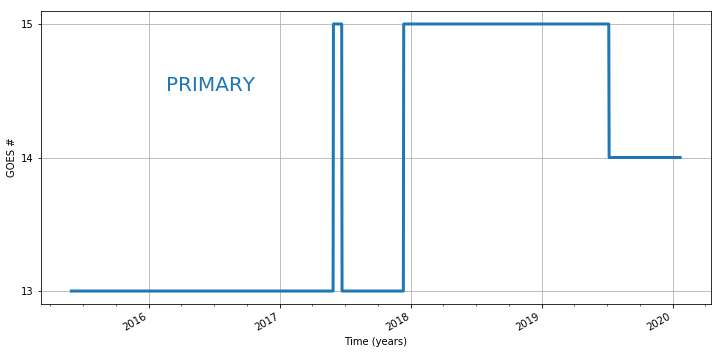

In [8]:
plt.figure(figsize=(12, 6))
color = 'C0'
plot_cxctime(times, t_primary['satellite'], color=color, lw=3)
plt.yticks([13, 14, 15], ["13", "14", "15"])
plt.xlabel("Time (years)")
plt.ylabel("GOES #")
plt.text(DateTime('2016:050:00:00:00').plotdate, 14.5, 'PRIMARY',
         fontsize='20', color=color)
plt.grid()

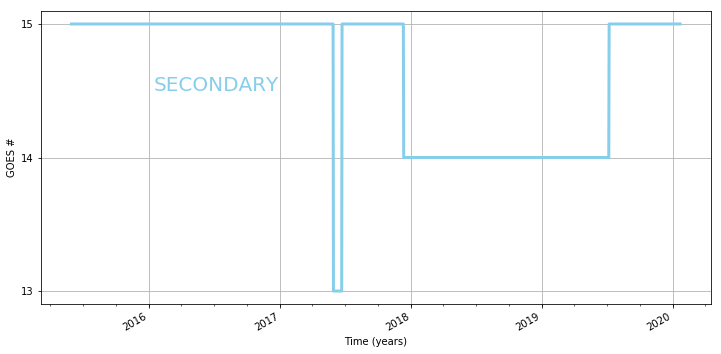

In [9]:
plt.figure(figsize=(12, 6))
color = 'skyblue'
plot_cxctime(times, t_secondary['satellite'], color=color, lw=3)
plt.yticks([13, 14, 15], ["13", "14", "15"])
plt.xlabel("Time (years)")
plt.ylabel("GOES #")
plt.text(DateTime('2016:015:00:00:00').plotdate, 14.5, 'SECONDARY',
         fontsize='20', color=color)
plt.grid()

In [58]:
okp14 = t_primary['satellite'] == 14
oks14 = t_secondary['satellite'] == 14

In [59]:
okp15 = t_primary['satellite'] == 15
oks15 = t_secondary['satellite'] == 15

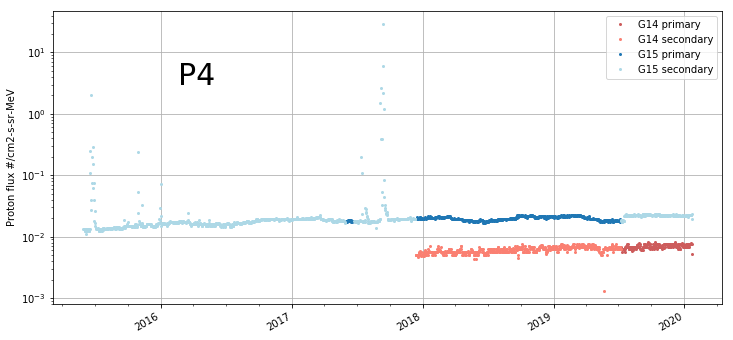

In [12]:
plt.figure(figsize=(12, 6))
# GOES 14
plot_cxctime(times[okp14], t_primary['median_p4'][okp14], color='indianred',
             marker='o', ms='2', linestyle='None', label='G14 primary')
plot_cxctime(times[oks14], t_secondary['median_p4'][oks14], color='salmon',
             marker='o', ms='2', linestyle='None', label='G14 secondary')
# GOES 15
plot_cxctime(times[okp15], t_primary['median_p4'][okp15], color='C0',
             marker='o', ms='2', linestyle='None', label='G15 primary')
plot_cxctime(times[oks15], t_secondary['median_p4'][oks15], color='lightblue',
             marker='o', ms='2', linestyle='None', label='G15 secondary')
plt.yscale('log')
plt.legend()
plt.ylabel('Proton flux #/cm2-s-sr-MeV')
plt.text(DateTime('2016:050:00:00:00').plotdate, 3, 'P4', fontsize=30, color='k');
plt.grid()

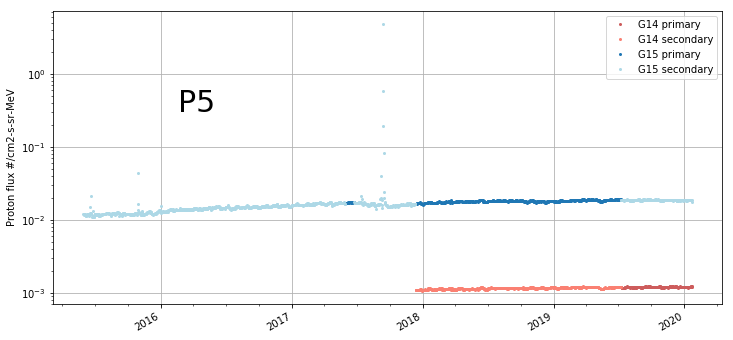

In [13]:
plt.figure(figsize=(12, 6))
# GOES 14
plot_cxctime(times[okp14], t_primary['median_p5'][okp14], color='indianred',
             marker='o', ms='2', linestyle='None', label='G14 primary')
plot_cxctime(times[oks14], t_secondary['median_p5'][oks14], color='salmon',
             marker='o', ms='2', linestyle='None', label='G14 secondary')
# GOES 15
plot_cxctime(times[okp15], t_primary['median_p5'][okp15], color='C0',
             marker='o', ms='2', linestyle='None', label='G15 primary')
plot_cxctime(times[oks15], t_secondary['median_p5'][oks15], color='lightblue',
             marker='o', ms='2', linestyle='None', label='G15 secondary')
plt.yscale('log')
plt.legend()
plt.ylabel('Proton flux #/cm2-s-sr-MeV')
plt.text(DateTime('2016:050:00:00:00').plotdate, 0.3, 'P5', fontsize=30, color='k');
plt.grid()

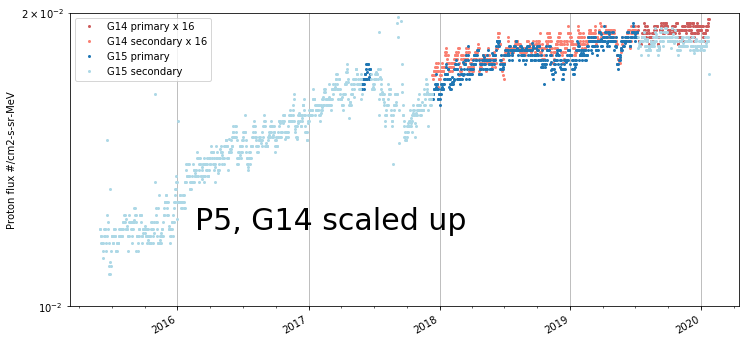

In [109]:
plt.figure(figsize=(12, 6))
# GOES 14
plot_cxctime(times[okp14], t_primary['median_p5'][okp14] * 16,
             color='indianred', marker='o', ms='2', linestyle='None', label='G14 primary x 16')
plot_cxctime(times[oks14], t_secondary['median_p5'][oks14] * 16,
             color='salmon', marker='o', ms='2', linestyle='None', label='G14 secondary x 16')
# GOES 15
plot_cxctime(times[okp15], t_primary['median_p5'][okp15], color='C0',
             marker='o', ms='2', linestyle='None', label='G15 primary')
plot_cxctime(times[oks15], t_secondary['median_p5'][oks15], color='lightblue',
             marker='o', ms='2', linestyle='None', label='G15 secondary')
plt.yscale('log')
plt.legend()
plt.ylabel('Proton flux #/cm2-s-sr-MeV')
plt.text(DateTime('2016:050:00:00:00').plotdate, 0.012, 'P5, G14 scaled up', fontsize=30, color='k')
plt.ylim(1e-2, 2e-2)
plt.grid()

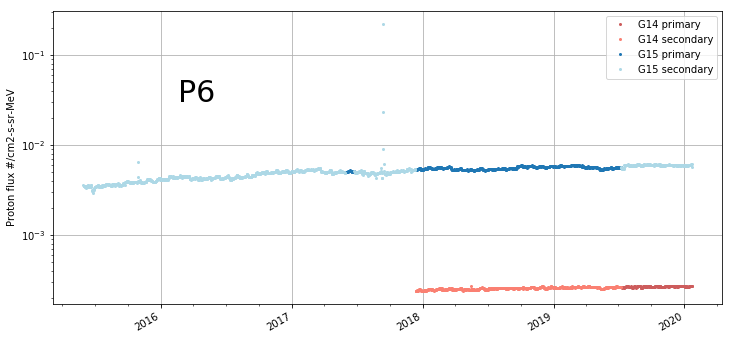

In [97]:
plt.figure(figsize=(12, 6))
# GOES 14
plot_cxctime(times[okp14], t_primary['median_p6'][okp14], color='indianred',
             marker='o', ms='2', linestyle='None', label='G14 primary')
plot_cxctime(times[oks14], t_secondary['median_p6'][oks14], color='salmon',
             marker='o', ms='2', linestyle='None', label='G14 secondary')
# GOES 15
plot_cxctime(times[okp15], t_primary['median_p6'][okp15], color='C0',
             marker='o', ms='2', linestyle='None', label='G15 primary')
plot_cxctime(times[oks15], t_secondary['median_p6'][oks15], color='lightblue',
             marker='o', ms='2', linestyle='None', label='G15 secondary')
plt.yscale('log')
plt.legend()
plt.ylabel('Proton flux #/cm2-s-sr-MeV')
plt.text(DateTime('2016:050:00:00:00').plotdate, 0.03, 'P6', fontsize=30, color='k');
plt.grid()